## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  68.751442  1683.658992  0.401725   9.481035  679.905164
1  36.429049  1518.210189  0.424284   2.968524  645.144120
2  40.058210   324.379882  0.178125   2.778800   70.130149
3  76.990052   229.014234  0.096300  10.012463   80.023796
4  43.584716   409.295039  0.832102   2.764136  343.461112


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9663567	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9569763	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9467654	total: 58.8ms	remaining: 19.6s
3:	learn: 0.9355758	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9224096	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9115874	total: 60.4ms	remaining: 10s
6:	learn: 0.8997742	total: 60.9ms	remaining: 8.64s
7:	learn: 0.8893146	total: 61.6ms	remaining: 7.63s
8:	learn: 0.8777021	total: 62ms	remaining: 6.83s
9:	learn: 0.8648717	total: 62.6ms	remaining: 6.19s
10:	learn: 0.8544285	total: 63ms	remaining: 5.66s
11:	learn: 0.8409999	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8305048	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8195017	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8103102	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8014227	total: 65.2ms	remaining: 4.01s
16:	learn: 0.7917044	total: 65.6ms	remaining: 3.79s
17:	learn: 0.7817940	total: 66ms	remaining: 3.6s
18:	learn: 0.7751853	total: 66.4ms	remaining: 3.43s
1

108:	learn: 0.2745575	total: 106ms	remaining: 871ms
109:	learn: 0.2715986	total: 107ms	remaining: 866ms
110:	learn: 0.2684513	total: 107ms	remaining: 860ms
111:	learn: 0.2650852	total: 108ms	remaining: 854ms
112:	learn: 0.2625411	total: 108ms	remaining: 849ms
113:	learn: 0.2598886	total: 109ms	remaining: 844ms
114:	learn: 0.2573050	total: 109ms	remaining: 839ms
115:	learn: 0.2549028	total: 109ms	remaining: 833ms
116:	learn: 0.2523693	total: 110ms	remaining: 828ms
117:	learn: 0.2497607	total: 110ms	remaining: 823ms
118:	learn: 0.2470255	total: 110ms	remaining: 818ms
119:	learn: 0.2447020	total: 111ms	remaining: 813ms
120:	learn: 0.2413928	total: 111ms	remaining: 808ms
121:	learn: 0.2392531	total: 111ms	remaining: 802ms
122:	learn: 0.2365279	total: 112ms	remaining: 798ms
123:	learn: 0.2345897	total: 112ms	remaining: 793ms
124:	learn: 0.2319203	total: 113ms	remaining: 790ms
125:	learn: 0.2296028	total: 113ms	remaining: 785ms
126:	learn: 0.2274128	total: 114ms	remaining: 781ms
127:	learn: 

289:	learn: 0.0593698	total: 185ms	remaining: 453ms
290:	learn: 0.0590575	total: 186ms	remaining: 452ms
291:	learn: 0.0587563	total: 186ms	remaining: 451ms
292:	learn: 0.0583668	total: 187ms	remaining: 450ms
293:	learn: 0.0580068	total: 187ms	remaining: 449ms
294:	learn: 0.0576369	total: 187ms	remaining: 448ms
295:	learn: 0.0573363	total: 188ms	remaining: 446ms
296:	learn: 0.0569073	total: 188ms	remaining: 445ms
297:	learn: 0.0565787	total: 188ms	remaining: 444ms
298:	learn: 0.0563089	total: 189ms	remaining: 443ms
299:	learn: 0.0560284	total: 189ms	remaining: 442ms
300:	learn: 0.0556587	total: 190ms	remaining: 440ms
301:	learn: 0.0553479	total: 190ms	remaining: 439ms
302:	learn: 0.0550400	total: 190ms	remaining: 438ms
303:	learn: 0.0547142	total: 191ms	remaining: 437ms
304:	learn: 0.0544639	total: 191ms	remaining: 435ms
305:	learn: 0.0541673	total: 191ms	remaining: 434ms
306:	learn: 0.0538317	total: 192ms	remaining: 433ms
307:	learn: 0.0534858	total: 192ms	remaining: 432ms
308:	learn: 

525:	learn: 0.0224563	total: 289ms	remaining: 260ms
526:	learn: 0.0223975	total: 289ms	remaining: 260ms
527:	learn: 0.0223731	total: 290ms	remaining: 259ms
528:	learn: 0.0222641	total: 290ms	remaining: 258ms
529:	learn: 0.0222070	total: 291ms	remaining: 258ms
530:	learn: 0.0221832	total: 291ms	remaining: 257ms
531:	learn: 0.0221596	total: 291ms	remaining: 256ms
532:	learn: 0.0221364	total: 292ms	remaining: 256ms
533:	learn: 0.0220813	total: 292ms	remaining: 255ms
534:	learn: 0.0220586	total: 293ms	remaining: 254ms
535:	learn: 0.0219653	total: 293ms	remaining: 254ms
536:	learn: 0.0219429	total: 293ms	remaining: 253ms
537:	learn: 0.0219209	total: 294ms	remaining: 252ms
538:	learn: 0.0218168	total: 294ms	remaining: 252ms
539:	learn: 0.0217639	total: 295ms	remaining: 251ms
540:	learn: 0.0217423	total: 295ms	remaining: 250ms
541:	learn: 0.0217211	total: 295ms	remaining: 250ms
542:	learn: 0.0217001	total: 296ms	remaining: 249ms
543:	learn: 0.0215803	total: 296ms	remaining: 248ms
544:	learn: 

709:	learn: 0.0130389	total: 368ms	remaining: 150ms
710:	learn: 0.0129770	total: 368ms	remaining: 150ms
711:	learn: 0.0129194	total: 369ms	remaining: 149ms
712:	learn: 0.0128748	total: 369ms	remaining: 149ms
713:	learn: 0.0128152	total: 370ms	remaining: 148ms
714:	learn: 0.0127538	total: 370ms	remaining: 147ms
715:	learn: 0.0127287	total: 370ms	remaining: 147ms
716:	learn: 0.0127127	total: 371ms	remaining: 146ms
717:	learn: 0.0126884	total: 371ms	remaining: 146ms
718:	learn: 0.0126250	total: 372ms	remaining: 145ms
719:	learn: 0.0126094	total: 372ms	remaining: 145ms
720:	learn: 0.0125472	total: 372ms	remaining: 144ms
721:	learn: 0.0125319	total: 373ms	remaining: 144ms
722:	learn: 0.0124895	total: 373ms	remaining: 143ms
723:	learn: 0.0124287	total: 374ms	remaining: 142ms
724:	learn: 0.0123873	total: 374ms	remaining: 142ms
725:	learn: 0.0123279	total: 374ms	remaining: 141ms
726:	learn: 0.0122874	total: 375ms	remaining: 141ms
727:	learn: 0.0122479	total: 375ms	remaining: 140ms
728:	learn: 

946:	learn: 0.0059791	total: 471ms	remaining: 26.3ms
947:	learn: 0.0059714	total: 471ms	remaining: 25.9ms
948:	learn: 0.0059437	total: 472ms	remaining: 25.3ms
949:	learn: 0.0059285	total: 472ms	remaining: 24.8ms
950:	learn: 0.0059123	total: 472ms	remaining: 24.3ms
951:	learn: 0.0059057	total: 473ms	remaining: 23.8ms
952:	learn: 0.0058788	total: 473ms	remaining: 23.3ms
953:	learn: 0.0058631	total: 473ms	remaining: 22.8ms
954:	learn: 0.0058533	total: 474ms	remaining: 22.3ms
955:	learn: 0.0058315	total: 474ms	remaining: 21.8ms
956:	learn: 0.0058252	total: 475ms	remaining: 21.3ms
957:	learn: 0.0057991	total: 475ms	remaining: 20.8ms
958:	learn: 0.0057929	total: 475ms	remaining: 20.3ms
959:	learn: 0.0057673	total: 476ms	remaining: 19.8ms
960:	learn: 0.0057421	total: 476ms	remaining: 19.3ms
961:	learn: 0.0057282	total: 477ms	remaining: 18.8ms
962:	learn: 0.0057188	total: 477ms	remaining: 18.3ms
963:	learn: 0.0056937	total: 477ms	remaining: 17.8ms
964:	learn: 0.0056784	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

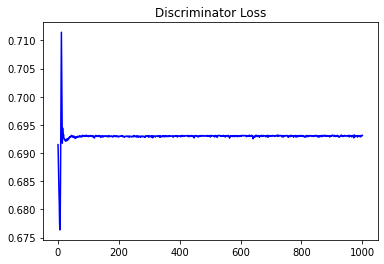

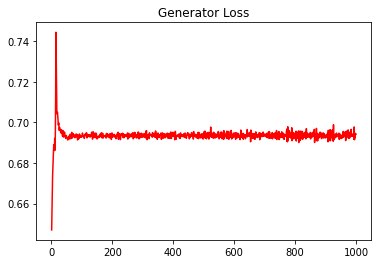

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0060389352989145585


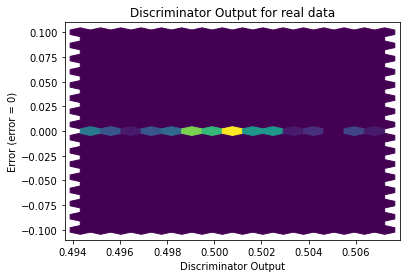

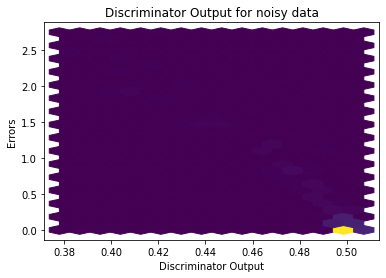

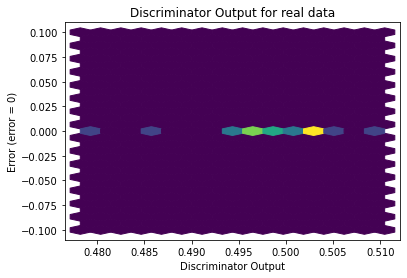

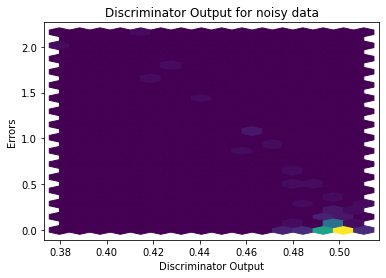

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


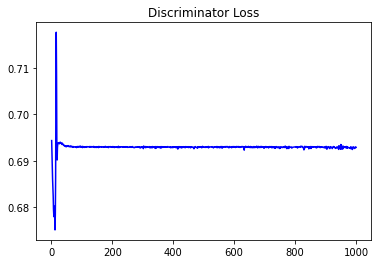

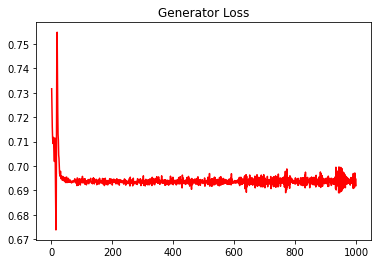

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.013654927667093687


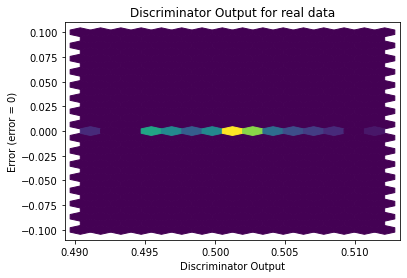

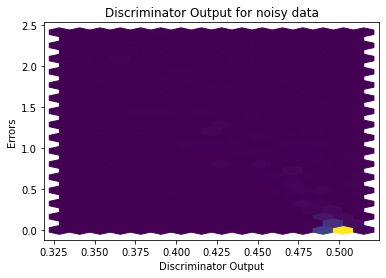

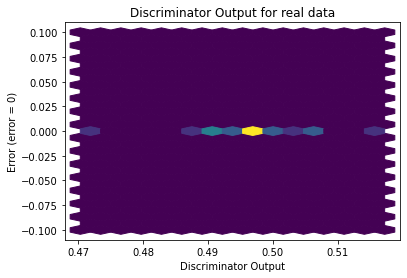

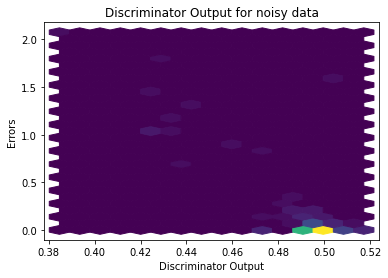

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6964]], requires_grad=True)
